In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [4]:
df = pd.read_csv('churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Explore whether there are missing values for any of the variables

In [5]:
null_records = df[df.isnull().any(axis=1)]

In [6]:
null_records

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.


 Compare the area code and state fields

In [7]:
df2 = df[['Area Code','State']]

In [8]:
df2

,Area Code,State
0,415,KS
1,415,OH
2,415,NJ
3,408,OH
4,415,OK
...,...,...
3328,415,AZ
3329,415,WV
3330,510,RI
3331,510,CT


In [9]:
print(df2.State.unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [10]:
df2.rename({'Area Code': 'AreaCode'}, axis=1, inplace=True)
print(df2.AreaCode.unique())

[415 408 510]


<ipython-input-10-ed02b540cd12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename({'Area Code': 'AreaCode'}, axis=1, inplace=True)


 Use a graph to visually determine whether there are any outliers among the number of
calls to customer service

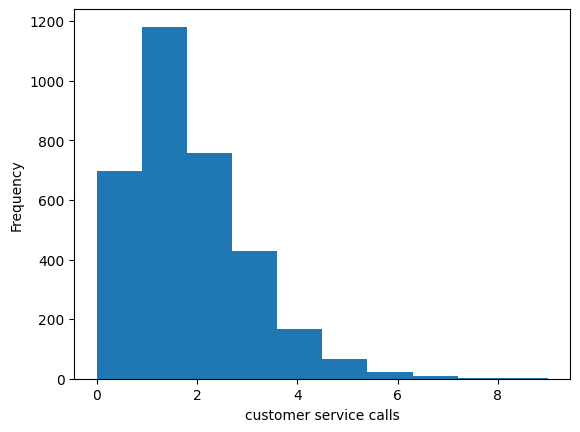

In [11]:
df['CustServ Calls'].plot(kind='hist')
plt.xlabel('customer service calls')
plt.show()

Identify the range of customer service calls that should be considered outliers, using The IQR method and the Z-score method

In [12]:
Q1 = df['CustServ Calls'].quantile(0.25)
Q3 = df['CustServ Calls'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outlier = df[(df['CustServ Calls']<lower_bound) | (df['CustServ Calls']>upper_bound)]

In [15]:
outlier

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,OK,172,408,398-3632,no,no,0,203.9,109,34.66,...,123,19.89,160.7,65,7.23,17.8,4,4.81,4,False.
3309,VT,100,408,340-9449,yes,no,0,219.4,112,37.30,...,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False.
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.


In [16]:
Z_score = (df['CustServ Calls']-df['CustServ Calls'].mean())/df['CustServ Calls'].std()
Z_score

,CustServ Calls
0,-0.427868
1,-0.427868
2,-1.188040
3,0.332305
4,1.092477
...,...
3328,0.332305
3329,1.092477
3330,0.332305
3331,0.332305


In [17]:
outlier = df[abs(Z_score)>3]

In [18]:
outlier

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
332,AL,86,415,380-3437,no,no,0,128.3,121,21.81,...,93,16.75,138.4,152,6.23,12.2,5,3.29,7,True.
522,KY,122,408,392-1616,no,yes,27,253.7,84,43.13,...,109,19.48,190.5,123,8.57,9.2,5,2.48,7,False.
542,MN,152,415,416-2778,yes,yes,20,237.5,120,40.38,...,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True.
694,WI,165,510,402-7746,no,no,0,154.2,91,26.21,...,108,22.83,188.8,99,8.50,10.9,4,2.94,6,False.
721,UT,103,510,327-3587,no,yes,36,87.2,92,14.82,...,110,14.39,166.7,80,7.50,10.9,5,2.94,6,True.
778,LA,115,415,386-6306,no,yes,26,170.5,107,28.99,...,77,18.46,225.7,71,10.16,13.6,5,3.67,6,False.
902,HI,149,510,393-8736,no,no,0,166.6,61,28.32,...,107,18.60,208.3,131,9.37,8.2,6,2.21,7,False.
908,CO,23,408,393-4027,no,no,0,190.2,89,32.33,...,108,14.14,219.8,73,9.89,15.0,4,4.05,6,False.
974,OR,21,510,383-5976,no,yes,31,135.9,90,23.10,...,84,23.04,179.1,89,8.06,9.5,7,2.57,6,False.
1142,UT,105,415,385-8184,no,no,0,106.4,71,18.09,...,83,20.41,147.7,114,6.65,5.3,4,1.43,6,True.


Transform the day minutes attribute using Z-score standardization

In [19]:
df_z_scaled = df.copy()
df_z_scaled['Day Mins'] = (df['Day Mins']-df['Day Mins'].mean())/df['Day Mins'].std()
df_z_scaled

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
0,KS,128,415,382-4657,no,yes,25,1.566532,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,-0.333688,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,1.168128,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,2.196267,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,-0.240054,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,-0.432830,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,0.942305,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,0.018817,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,0.624684,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


 Calculate the skewness of day minutes

In [20]:
median = df['Day Mins'].median()
mean = df['Day Mins'].mean()
sd = df['Day Mins'].std()
skewness = (3*(mean-median))/sd

In [21]:
skewness

0.020659931488028725

 Calculate the skewness of the Z-score standardized day minutes

In [22]:
median = df_z_scaled['Day Mins'].median()
mean = df_z_scaled['Day Mins'].mean()
sd = df_z_scaled['Day Mins'].std()
skewness_z_scaled = (3*(mean-median))/sd

In [23]:
skewness_z_scaled

0.020659931488030952

Construct a normal probability plot of day minutes

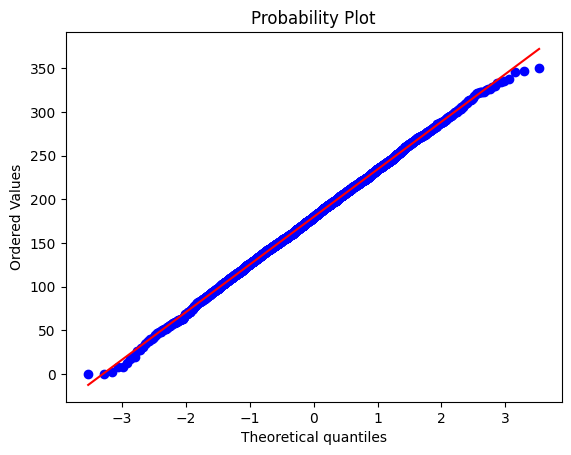

In [24]:
import scipy.stats as stats

plt.figure()
stats.probplot(df['Day Mins'], dist='norm', plot=plt)
plt.show()

 Construct a normal probability plot of international minutes.

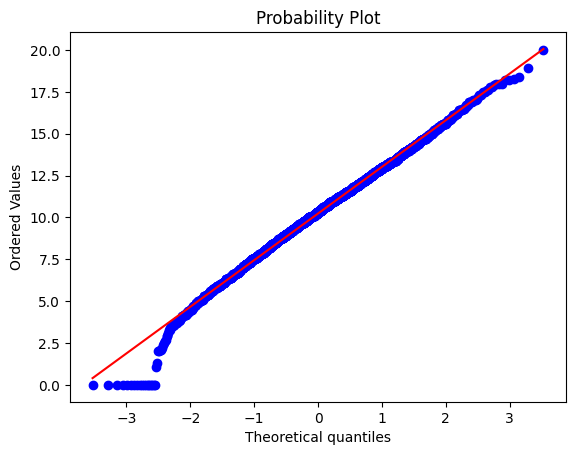

In [25]:
plt.figure()
stats.probplot(df['Intl Mins'], dist='norm', plot=plt)
plt.show()

Construct a normal probability plot of the derived variable nonzero international minutes

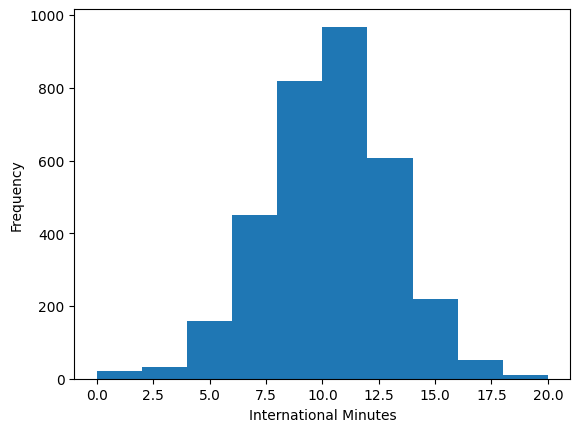

In [26]:
df['Intl Mins'].plot(kind='hist')
plt.xlabel('International Minutes')
plt.show()

Transform the night minutes attribute using Z-score standardization. Using a graph

In [27]:
df_z_scaled = df.copy()
df_z_scaled['Night Mins'] = (df['Night Mins']-df['Night Mins'].mean())/df['Night Mins'].std()
df_z_scaled

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,0.866613,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,1.058412,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,-0.756756,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,-0.078539,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,-0.276270,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,1.546807,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,-0.189269,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,-0.177405,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,-1.219445,137,6.26,5.0,10,1.35,2,False.


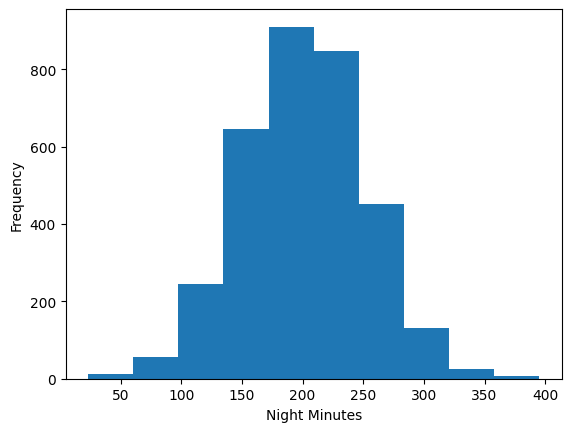

In [28]:
df['Night Mins'].plot(kind='hist')
plt.xlabel('Night Minutes')
plt.show()

In [29]:
df['Night Mins'].min()

23.2

In [30]:
df['Night Mins'].max()

395.0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [33]:
from sklearn.preprocessing import LabelEncoder
new_data = dict(df.dtypes)
for name , type_ in new_data.items():
  if str(type_) == 'object':
    Le = LabelEncoder()
    df[name] = Le.fit_transform(df[name])
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn.
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [34]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Generate CART decision tree

In [36]:
model = tree.DecisionTreeClassifier(criterion = "gini", splitter="best")
clf = model.fit(X_train, y_train)
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

In [37]:
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)

Classes:  [0 1]
Tree Depth:  19
No. of leaves:  161
No. of features:  20


In [38]:
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)

Accuracy Score:  0.9010494752623688


In [39]:
print(classification_report(y_test, pred_labels_te))
score_tr = model.score(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       579
           1       0.60      0.77      0.67        88

    accuracy                           0.90       667
   macro avg       0.78      0.85      0.81       667
weighted avg       0.92      0.90      0.91       667



In [40]:
print('Accuracy Score: ', score_tr)
print(classification_report(y_train, pred_labels_tr))

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2271
           1       1.00      1.00      1.00       395

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



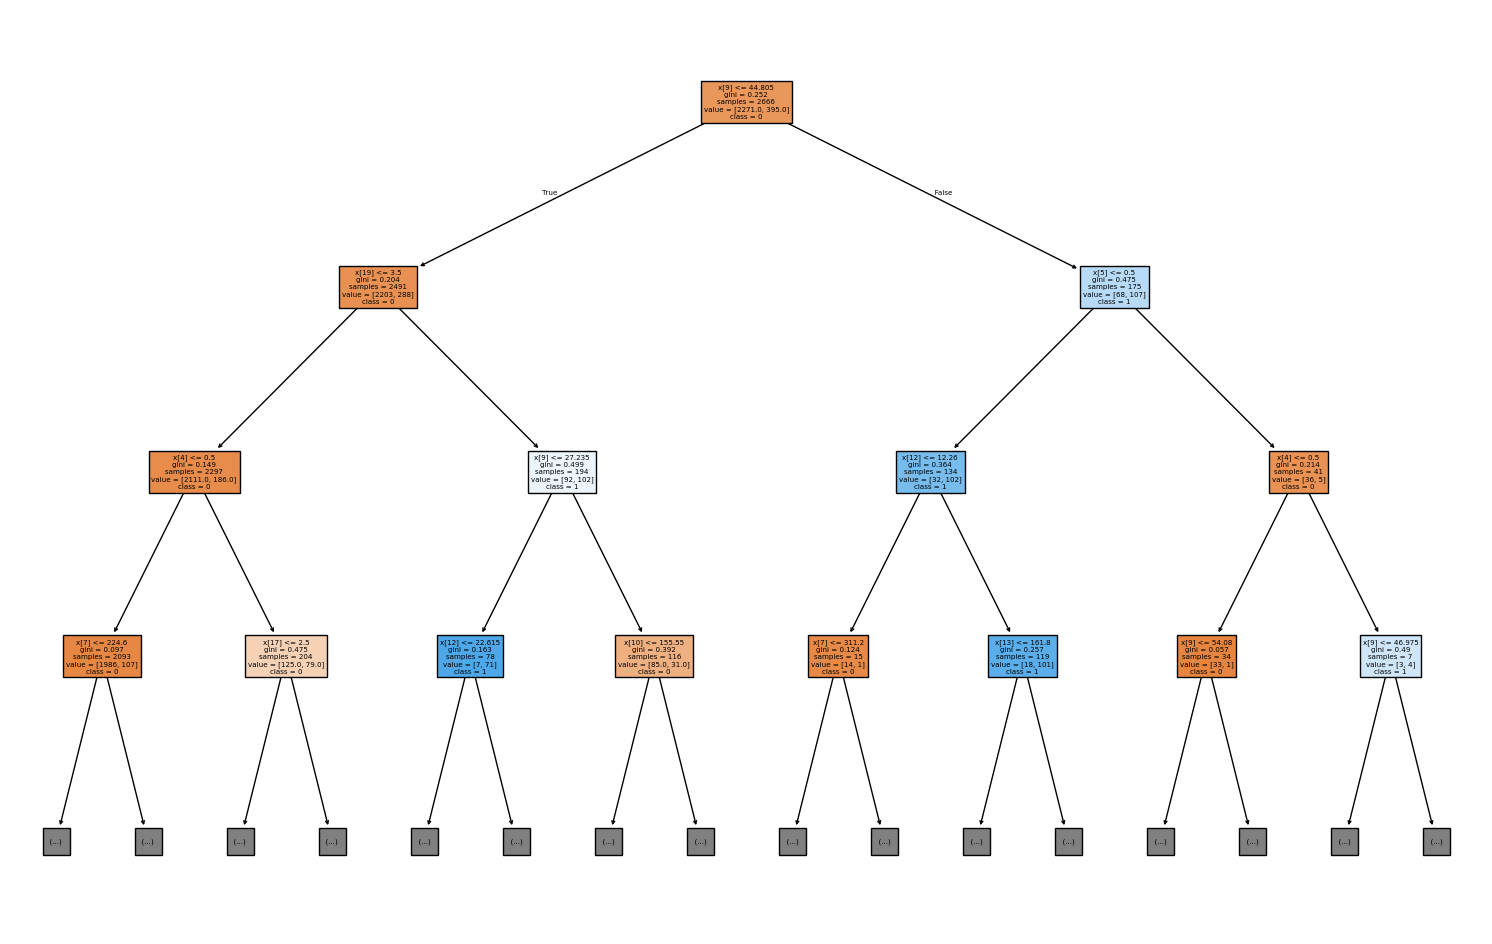

In [41]:
fig = plt.figure(figsize=(19,12))
tree.plot_tree(model, max_depth=3, class_names=['0','1'], filled=True)
plt.show()

Generate C4.5 decision tree

In [42]:
!git clone https://github.com/barisesmer/C4.5.git

Cloning into 'C4.5'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 43 (delta 1), reused 1 (delta 1), pack-reused 40 (from 1)
Receiving objects: 100% (43/43), 822.80 KiB | 11.75 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [43]:
import shutil
shutil.copy('/content/C4.5/c45/c45.py', '/content')

'/content/c45.py'

In [44]:
from c45 import C45
clf = C45(pathToNames=list(df.columns), pathToData='/content/churn.csv')
clf = model.fit(X_train, y_train)

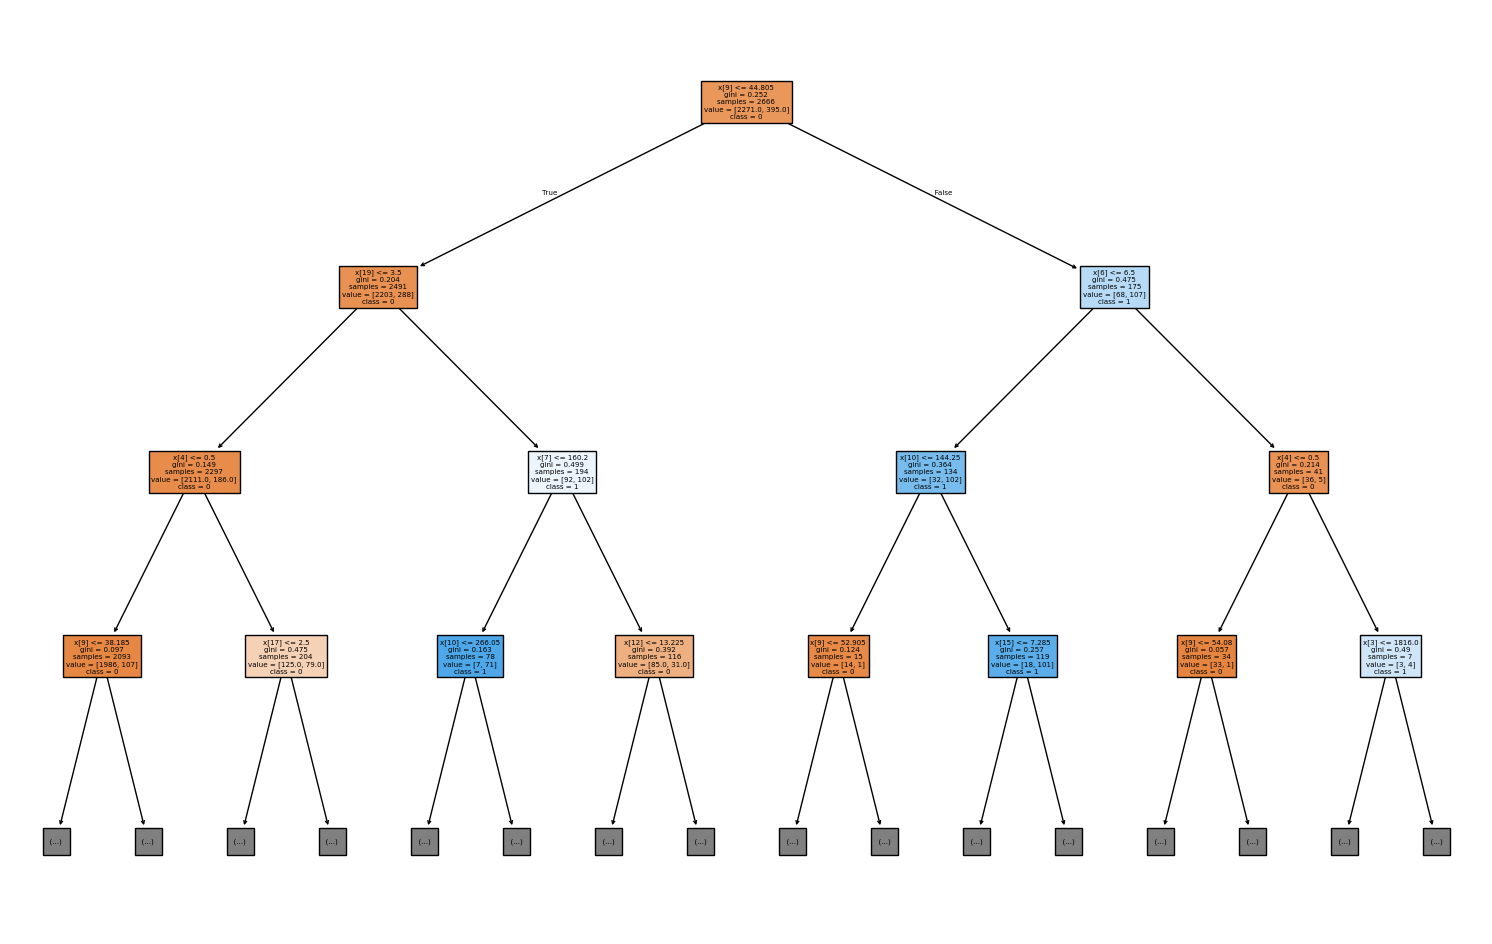

In [45]:
fig = plt.figure(figsize=(19,12))
tree.plot_tree(model, max_depth=3, class_names=['0','1'], filled=True)
plt.show()

In [46]:
print(f'Accuracy: {clf.score(X_test, y_test)}')

Accuracy: 0.8995502248875562


Apply a CART model for predicting churn

In [47]:
model = tree.DecisionTreeClassifier(criterion = "gini", splitter="best")
clf = model.fit(X_train, y_train)
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

In [48]:
cm_train = metrics.confusion_matrix(y_train, pred_labels_tr)
cm_test = metrics.confusion_matrix(y_test, pred_labels_te)
print("\nConfusion matrix for test data:\n", cm_test)


Confusion matrix for test data:
 [[534  45]
 [ 22  66]]


In [49]:
false_positives = cm_test[0][1]
total_negatives = cm_test[0][0] + cm_test[0][1]
proportion_false_positives = false_positives / total_negatives
print(f"Proportion of false positives: {proportion_false_positives}")

Proportion of false positives: 0.07772020725388601


In [50]:
false_negatives = cm_test[1][0]
total_positives = cm_test[1][0] + cm_test[0][0]
proportion_false_negatives = false_negatives / total_positives
print(f"Proportion of false negatives: {proportion_false_negatives}")

Proportion of false negatives: 0.039568345323741004


In [51]:
total_errors = cm_test[0][1] + cm_test[1][0]
total_samples = len(y_test)
overall_error_rate = total_errors / total_samples
print(f"Overall error rate: {overall_error_rate}")

Overall error rate: 0.10044977511244378


In [52]:
accuracy_test = metrics.accuracy_score(y_test, pred_labels_te)
print(f"Accuracy on test data: {accuracy_test}")

Accuracy on test data: 0.8995502248875562


In [53]:
sensitivity = cm_test[1][1] / (cm_test[1][1] + cm_test[1][0])
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.75


In [54]:
specificity = cm_test[0][0] / (cm_test[0][0] + cm_test[0][1])
print(f"Specificity: {specificity}")

Specificity: 0.9222797927461139


Adjust the misclassification costs for the CART
model to reduce the prevalence of the more costly type of error

In [55]:
# Adjust the misclassification costs
model = tree.DecisionTreeClassifier(criterion = "gini", splitter="best", class_weight={0: 1, 1: 50})
clf = model.fit(X_train, y_train)
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)
cm2_test = metrics.confusion_matrix(y_test, pred_labels_te)

In [56]:
print("\nConfusion matrix for test data:\n", cm2_test)


Confusion matrix for test data:
 [[539  40]
 [ 27  61]]


In [57]:
false_positives = cm2_test[0][1]
total_negatives = cm2_test[0][0] + cm2_test[0][1]
proportion_false_positives = false_positives / total_negatives
print(f"Proportion of false positives: {proportion_false_positives}")

Proportion of false positives: 0.0690846286701209


In [58]:
false_negatives = cm2_test[1][0]
total_positives = cm2_test[1][0] + cm2_test[0][0]
proportion_false_negatives = false_negatives / total_positives
print(f"Proportion of false negatives: {proportion_false_negatives}")

Proportion of false negatives: 0.04770318021201413


In [59]:
total_errors = cm2_test[0][1] + cm2_test[1][0]
total_samples = len(y_test)
overall_error_rate = total_errors / total_samples
print(f"Overall error rate: {overall_error_rate}")

Overall error rate: 0.10044977511244378


In [60]:
accuracy_test = metrics.accuracy_score(y_test, pred_labels_te)
print(f"Accuracy on test data: {accuracy_test}")

Accuracy on test data: 0.8995502248875562


In [61]:
sensitivity = cm2_test[1][1] / (cm2_test[1][1] + cm2_test[1][0])
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.6931818181818182


In [62]:
specificity = cm2_test[0][0] / (cm2_test[0][0] + cm2_test[0][1])
print(f"Specificity: {specificity}")

Specificity: 0.9309153713298791


Perform a cost/benefit analysis for the default CART model

In [63]:
cost_false_positive = 0
cost_false_negative = 500
benefit_true_positive = 300
benefit_true_negative = 0

cost = (cost_false_positive * cm_test[0][1]) + (cost_false_negative * cm_test[1][0]) - (benefit_true_positive * cm_test[1][1]) - (benefit_true_negative * cm_test[0][0])
print(f"Overall anticipated cost: {cost}")

Overall anticipated cost: -8800


Perform a cost/benefit analysis for the CART model with the adjusted misclassification
costs

In [64]:
cost = (cost_false_positive * cm2_test[0][1]) + (cost_false_negative * cm2_test[1][0]) - (benefit_true_positive * cm2_test[1][1]) - (benefit_true_negative * cm2_test[0][0])
print(f"Overall anticipated cost: {cost}")

Overall anticipated cost: -4800
